In [38]:
#A module that allows sending HTTP requests - retrieving websites
!pip install requests beautifulsoup4
import requests
from bs4 import BeautifulSoup

def fetch_page(url):
   response = requests.get(url)
   if response.status_code == 200:
     soup = BeautifulSoup(response.text, 'html.parser')
     return soup
   else:
     return None

In [39]:
#A module that allows the use of regular expressions (a sequence of characters that defines a search)
import re
def index_words(soup):
   index = {}
   words = re.findall(r'\w+', soup.get_text())
   for word in words:
     word = word.lower()
     if word in index:
       index[word] += 1
     else: index[word] = 1
   return index

In [40]:
#removing common words (stop words). These are words that have no real value since they appear frequently in every text
def remove_stop_words(index):
   stop_words = {'a', 'an', 'the', 'and', 'or','in', 'on', 'at'}
   for stop_word in stop_words:
     if stop_word in index:
       del index[stop_word]
   return index

In [41]:
#each word remains in its natural form, without endings

from nltk.stem import PorterStemmer

def apply_stemming(index):
   stemmer = PorterStemmer()
   stemmed_index = {}
   for word, count in index.items():
       stemmed_word = stemmer.stem(word)
       if stemmed_word in stemmed_index:
          stemmed_index[stemmed_word] += count
       else: stemmed_index[stemmed_word] = count
   return stemmed_index

In [42]:
#Retrieving all words from the query
def search(query, index):
   query_words = re.findall(r'\w+', query.lower())
   results = {}
   for word in query_words:
       if word in index:
         results[word] = index[word]
   return results

In [43]:
def search_engine(url, query):
   soup = fetch_page(url)
   if soup is None:
     return None
   index = index_words(soup)
   index = remove_stop_words(index)
   index = apply_stemming(index)
   results = search(query, index)
   return results

In [44]:
!pip install firebase

In [45]:
from firebase import firebase
FBconn = firebase.FirebaseApplication('https://firstproject-ddd4e-default-rtdb.firebaseio.com/')

url = 'https://cad.onshape.com/help/Content/Glossary/glossary.htm?tocpath=_____19'
queryList = ["cad", "feature", "sketch", "assembly", "part", "document", "parametric", "constraint", "mate", "revision"]
queryString = " ".join(queryList)
results = search_engine(url, queryString)

print("Search Results:")
for word, count in results.items():
    print(f"{word} => Count: {count}")

rank=1
for word, count in results.items():
   rank = rank*2/count
rank = 1-rank
print("Rank of the page is:",rank)

result = FBconn.post('/Results', results)
print()
print("Data saved in firebase in Results with name:",result)

Search Results:
cad => Count: 6
sketch => Count: 220
part => Count: 524
document => Count: 164
constraint => Count: 7
mate => Count: 109
Rank of the page is: 0.9999999992605542

Data saved in firebase in Results with name: {'name': '-O1SdlWK8yJXc3GX8NZ8'}


{
    "cad": 6,
    "constraint": 7,
    "document": 164,
    "mate": 109,
    "part": 524,
    "sketch": 220
}



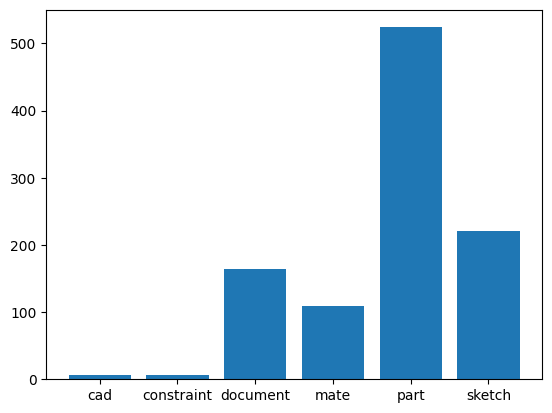

In [46]:
import json
from firebase import firebase
import matplotlib.pyplot as plt

FBconn = firebase.FirebaseApplication('https://firstproject-ddd4e-default-rtdb.firebaseio.com/')
result = FBconn.get('/Results', None)
dictionary = {}

for element in result.values():
    dictionary.update(element)

print(json.dumps(dictionary, indent=4))
print()

plt.bar(dictionary.keys(), dictionary.values())
plt.show()